# Supervised Learning using Python

## Supervised Learning
* We have labeled data and are trying to predict a label based on known features
* It is commonly used in applications where historical data predicts likely future events

## Types of Supervised Learning

* Regression - predicting a continuous- value attribute associated with an object
    * Algorithms: Linear Regression, LASSO, Ridge Regression ...
    * Examples: Stock prices, Housing price
* Classification - identifying to which category an object belongs to
    * Algorithms: Logistic Regression, Classification Tree, Random Forest...  
    * Examples: Email Spam filter, Loan default (Yes/No), Image recognition

## Machine Learning Workflow
<img src="machinelearningflow.png">

### Import Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
import sklearn
print(sklearn.__version__)

0.18.1


## Linear Regression
linear regression is an approach for modeling the relationship between a scalar dependent variable y and one or more explanatory variables (or independent variables) denoted X.

We will use Boston Housing dataset for this regression example, the data contains information about the housing values in suburbs of Boston. 

In [7]:
from sklearn.datasets import load_boston
boston = load_boston()

In [8]:
print(boston.keys())
print(boston.feature_names)
# print(boston.DESCR)

dict_keys(['feature_names', 'DESCR', 'data', 'target'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [9]:
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['PRICE'] = boston.target

In [10]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
bos.info()
bos.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Exploring Data Set

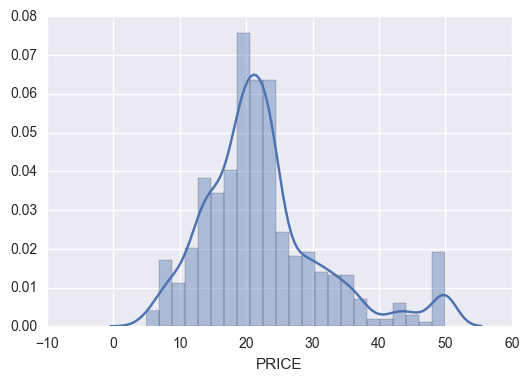

In [12]:
sns.distplot(bos['PRICE'])
#bos['PRICE'].hist(bins = 50, alpha = 0.7)

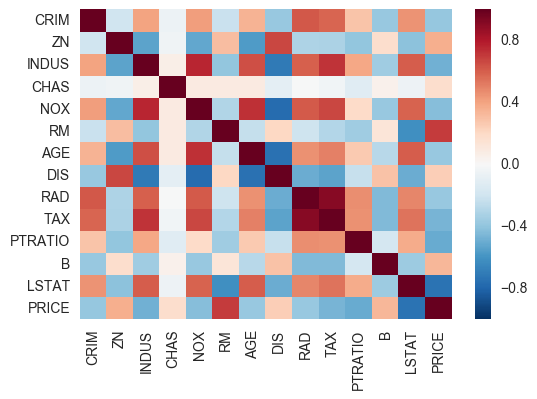

In [14]:
bos.corr()
sns.heatmap(bos.corr())

### Train a Linear Regression Model

In [15]:
X = bos.drop('PRICE', axis = 1)
y = bos['PRICE']

In [16]:
from sklearn.model_selection import train_test_split
# from sklearn.cross_validation import train_test_split # for sklearn 0.17 and before
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [17]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Model Evaluation
Let's Look at the coefficients and how we can interpret them

In [18]:
# intercept
print ('Estimated intercept coefficient:', lm.intercept_)

Estimated intercept coefficient: 29.0232708934


In [177]:
pd.DataFrame(lm.coef_,X.columns,columns = ['Coefficients'])

,Coefficients
CRIM,-0.099118
ZN,0.039896
INDUS,0.075881
CHAS,0.268496
NOX,-14.376094
RM,4.826297
AGE,-0.007358
DIS,-1.326472
RAD,0.272550
TAX,-0.013041


Interpreting the estimated coefficients:
* Holding all other features fixed, a 1 unit increase in per capita crime rate by town is associate with a decrease of $100 in median house value


### Predictions

In [19]:
predictions = lm.predict(X_test)

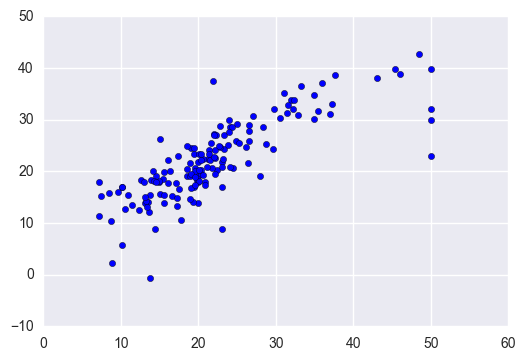

In [20]:
plt.scatter(y_test, predictions)

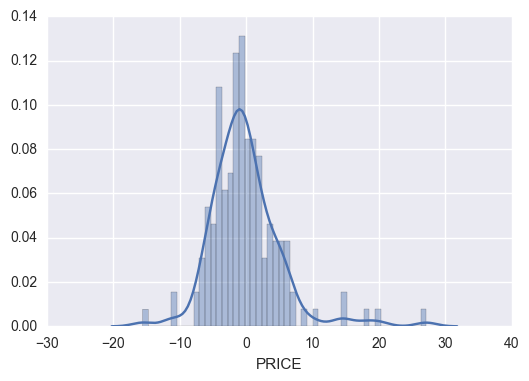

In [21]:
sns.distplot((y_test - predictions), bins = 50)

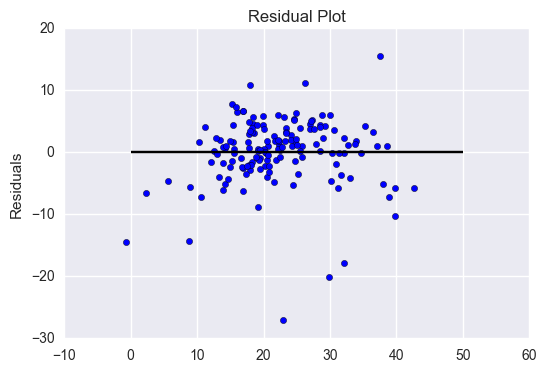

In [181]:
plt.scatter(predictions, predictions - y_test)
plt.hlines(y = 0, xmin = 0, xmax = 50)
plt.title('Residual Plot')
plt.ylabel('Residuals')

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [22]:
from sklearn import metrics

In [23]:
print('MSE:', metrics.mean_squared_error(y_test,predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print('MAE:', metrics.mean_absolute_error(y_test,predictions))


MSE: 28.3764496555
RMSE: 5.32695500783
MAE: 3.68924036441


In [182]:
print('R square:', metrics.r2_score(y_train, lm.predict(X_train)))

R square: 0.764559849031


## Logistic Regression

Logistic regression predicts the probability of an outcome that can only have two values (categories)

<img src="LogReg_1.png">

we will be working with the Titanic dataset from Kaggle for Classification problem

In [24]:
df = pd.read_csv('Titanic.csv')

In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Exploring Dataset and Data cleaning

In [26]:
df['Survived'].value_counts()
#sns.countplot(x = 'Survived', data = df)

0    549
1    342
Name: Survived, dtype: int64

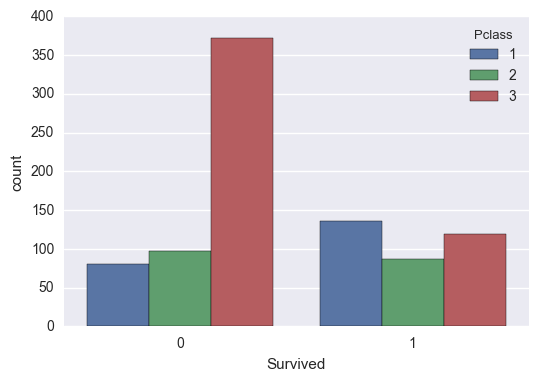

In [28]:
#sns.countplot(x = 'Survived',hue = 'Sex', data = df)
sns.countplot(x = 'Survived',hue = 'Pclass', data = df)

### Data Cleaning

* We want to fill in the missing data age instead of dropping the missing age data rows.
* We also need to convert categorical features to dummy variables. Otherwise our machine learning algorithm won't be able to take in those features.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


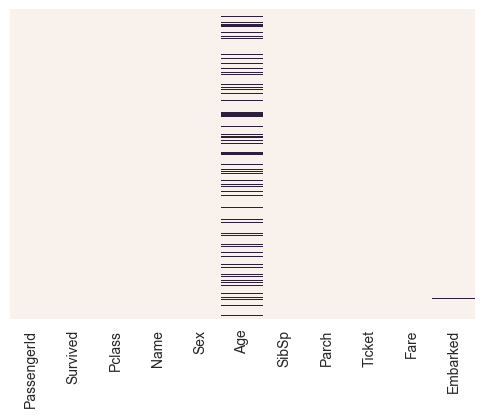

In [29]:
df.info()
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [30]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [31]:
df.dropna(inplace = True)

Convert Categorical Features
* We use get_dummies function in pandas in this example
* We can also use LabelEncoder and OneHotEncoder from sklearn.preprocessing

In [32]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
embark = pd.get_dummies(df['Embarked'],drop_first=True)

In [33]:
df.drop(['Sex','Embarked','PassengerId','Name','Ticket'],axis=1,inplace=True)
df = pd.concat([df,sex,embark],axis=1)

In [34]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,0.0,0.0,0.0
2,1,3,26.0,0,0,7.9250,0.0,0.0,1.0
3,1,1,35.0,1,0,53.1000,0.0,0.0,1.0
4,0,3,35.0,0,0,8.0500,1.0,0.0,1.0


### Train a Logistic regression model

In [35]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived',axis=1), 
                                                    df['Survived'], test_size=0.30, 
                                                    random_state=123)

In [36]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [37]:
predictions = logmodel.predict(X_test)

In [38]:
probs = logmodel.predict_proba(X_test)

In [186]:
pred1 = np.where(probs[:,1] > 0.2, 1,0)
#pred1

### Model Evaluation

Confusion Matrix
<img src="confusionmatrix1.png">

Sensitivity(recall or TPR) = TP/(TP + FN)

Precision = TP/(TP + FP)

Specificity = TN/(TN + FP)

FPR = FP/(FP + TN)

In [39]:
from sklearn import metrics
print ('Accuracy:', metrics.accuracy_score(y_test, predictions))
print ('AUC:', metrics.roc_auc_score(y_test, probs[:, 1]))
print (metrics.confusion_matrix(y_test, predictions))
print (metrics.classification_report(y_test, predictions))

Accuracy: 0.786516853933
AUC: 0.84012070784
[[146  15]
 [ 42  64]]
             precision    recall  f1-score   support

          0       0.78      0.91      0.84       161
          1       0.81      0.60      0.69       106

avg / total       0.79      0.79      0.78       267



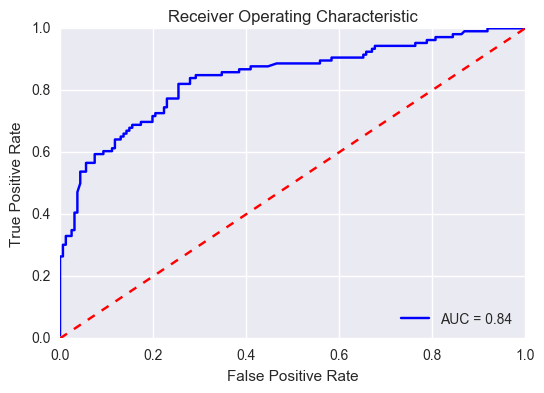

In [152]:
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


## Classification Tree and Random Forest


### Decision trees

In [40]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [41]:
predictions = dtree.predict(X_test)

In [42]:
print ('Accuracy:', metrics.accuracy_score(y_test, predictions))
print (metrics.confusion_matrix(y_test, predictions))
print (metrics.classification_report(y_test, predictions))

Accuracy: 0.760299625468
[[131  30]
 [ 34  72]]
             precision    recall  f1-score   support

          0       0.79      0.81      0.80       161
          1       0.71      0.68      0.69       106

avg / total       0.76      0.76      0.76       267



### Random Forests

In random forests, each tree in the ensemble is built from a sample drawn with replacement (i.e., a bootstrap sample) from the training set. 

In addition, when splitting a node during the construction of the tree, the split that is chosen is the best split among a random subset of the features. 

As a result of this randomness, the bias of the forest usually slightly increases (with respect to the bias of a single non-random tree) but, due to averaging, its variance also decreases, usually more than compensating for the increase in bias, hence yielding an overall better model.

In [43]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [44]:
rf_pred = rf.predict(X_test)
rf_probs = rf.predict_proba(X_test)

In [45]:
print ('Accuracy:', metrics.accuracy_score(y_test, rf_pred))
print ('AUC:', metrics.roc_auc_score(y_test, rf_probs[:, 1]))
print (metrics.confusion_matrix(y_test, rf_pred))
print (metrics.classification_report(y_test, rf_pred))

Accuracy: 0.801498127341
AUC: 0.871703972811
[[140  21]
 [ 32  74]]
             precision    recall  f1-score   support

          0       0.81      0.87      0.84       161
          1       0.78      0.70      0.74       106

avg / total       0.80      0.80      0.80       267



Feature Importances

In [159]:
rf.feature_importances_

array([ 0.08588665,  0.25264127,  0.05146653,  0.03818943,  0.2708979 ,
        0.2652142 ,  0.01044009,  0.02526394])

In [46]:
rf_imp = pd.DataFrame(rf.feature_importances_,X_train.columns,columns = ['feature_importances'])
rf_imp.sort_values(['feature_importances'], ascending=[False])

,feature_importances
Fare,0.266745
Age,0.266508
male,0.256366
Pclass,0.089082
SibSp,0.049896
Parch,0.036728
S,0.025229
Q,0.009445


## Gradiant Boosting (GBM)

Boosting combines a set of weak learners and delivers improved prediction accuracy. At any instant t, the model outcomes are weighed based on the outcomes of previous instant t-1. The outcomes predicted correctly are given a lower weight and the ones miss-classified are weighted higher.  This continues for many iterations. In the end, all models are given a weight depending on their accuracy and a consolidated result is generated.

In [161]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier(random_state=123)
gbm.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=123,
              subsample=1.0, verbose=0, warm_start=False)

In [162]:
gbm_pred = gbm.predict(X_test)
gbm_probs = gbm.predict_proba(X_test)

In [163]:
print ('Accuracy:', metrics.accuracy_score(y_test, gbm_pred))
print ('AUC:', metrics.roc_auc_score(y_test, gbm_probs[:, 1]))
print (metrics.confusion_matrix(y_test, gbm_pred))
print (metrics.classification_report(y_test, gbm_pred))

Accuracy: 0.816479400749
AUC: 0.854125161139
[[153   8]
 [ 41  65]]
             precision    recall  f1-score   support

          0       0.79      0.95      0.86       161
          1       0.89      0.61      0.73       106

avg / total       0.83      0.82      0.81       267



GBM feature importance

In [164]:
gbm_imp = pd.DataFrame(gbm.feature_importances_,X_train.columns,columns = ['feature_importances'])
gbm_imp.sort_values(['feature_importances'], ascending=[False])

,feature_importances
Fare,0.423755
Age,0.271792
male,0.133694
Pclass,0.068295
SibSp,0.044655
Parch,0.027500
S,0.025701
Q,0.004608


## Reference

* Scikit Learn website: http://scikit-learn.org/stable/index.html
* An Introduction to Statistical Learning: http://www-bcf.usc.edu/~gareth/ISL/
* Logistic Regression: http://www.saedsayad.com/logistic_regression.htm